# LSTM - word2vec sequence

- **Training set**: LO_SARD102 (95%) (0.75 split)
- **Test/Validation set:** LO_SARD102 (95%) (0.25 split)
- **Features**: word2vec sequence (100)
- **Class imbalance processing**: SMOTE

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from helper_functions import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train = numpy.load('/mnt/md0/user/scheuererra68323/LOSARD_w2vseq_SMOTE_X_full_train.npy', mmap_mode='r')
Y_train = numpy.load('/mnt/md0/user/scheuererra68323/LOSARD_w2vseq_SMOTE_Y_full_train.npy', mmap_mode='r')
print(X_train.shape)
print(Y_train.shape)

X_val = numpy.load('/mnt/md0/user/scheuererra68323/LOSARD_w2vseq_X_full_val.npy', mmap_mode='r')
Y_val = numpy.load('/mnt/md0/user/scheuererra68323/LOSARD_w2vseq_Y_full_val.npy', mmap_mode='r')
print(X_val.shape)
print(Y_val.shape)

X_test =  numpy.load('/mnt/md0/user/scheuererra68323/JTT_w2vseq_X.npy',  mmap_mode='r')
Y_test =  numpy.load('/mnt/md0/user/scheuererra68323/JTT_w2vseq_Y.npy',  mmap_mode='r')
print(X_test.shape)
print(Y_test.shape)

/home/scheuererra68323/venv37/lib/python3.7/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


(255442, 100, 100)
(255442,)
(33215, 100, 100)
(33215,)
(21851, 100, 100)
(21851,)


In [2]:
train_gen = DataGenerator(_X=X_train, _y=Y_train, batch_size=2048)
val_gen =   DataGenerator(_X=X_val,   _y=Y_val,   batch_size=2048)
test_gen =  DataGenerator(_X=X_test,  _y=Y_test,  batch_size=2048)

## Build & train keras model

In [3]:
model = keras.Sequential()
model.add(layers.LSTM(64, input_shape=(100, 100), 
                      return_sequences=True))
model.add(layers.Dropout(0.1))
model.add( layers.TimeDistributed(layers.Dense(16)) )
model.add(layers.Flatten())
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy']
             )
history = model.fit_generator(train_gen,
                    epochs=4,
                    verbose=True,
                    validation_data=val_gen
                   )

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 64)           42240     
_________________________________________________________________
dropout (Dropout)            (None, 100, 64)           0         
_________________________________________________________________
time_distributed (TimeDistri (None, 100, 16)           1040      
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1601      
Total params: 44,881
Trainable params: 44,881
Non-trainable params: 0
_________________________________________________________________
Epoch 1/4
125/125 [==============================] - 142s 1s/step - loss: 0.1986 - accuracy: 0.9174 - val_loss: 0.0458

## Evaluation

              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98     21243
         1.0       0.09      0.05      0.07       608

    accuracy                           0.96     21851
   macro avg       0.53      0.52      0.52     21851
weighted avg       0.95      0.96      0.95     21851

Confusion matrix:
[[20918   325]
 [  575    33]]

Confusion matrix (Percentages):
[[95.73   1.487]
 [ 2.631  0.151]]

Metrics:
Sensitivity (TPR): 0.054276
Specifity (TNR):   0.984701

FPR: 0.015299
FNR: 0.945724

Balanced accuracy: 0.519489

Test loss:	0.196850
Test accuracy:	0.958812


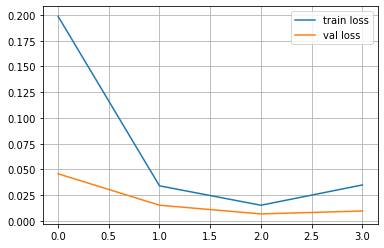

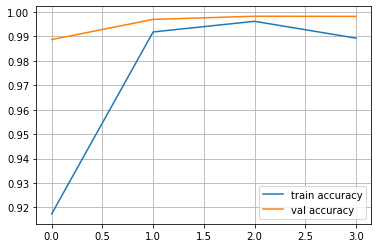

In [4]:
Y_pred = numpy.round(model.predict_generator(test_gen))

print(classification_report(Y_test, Y_pred))
print_metrics(confusion_matrix(Y_test, Y_pred), Y_test)
print()
score = model.evaluate_generator(test_gen, verbose=False)
print('Test loss:\t{:.6f}'.format(score[0]))
print('Test accuracy:\t{:.6f}'.format(score[1]))

plot_loss(history)
plot_accuracy(history)

## Discussion
Barely any learning effect

best testJTT_LSTM_word2vec result! 5.43% sensitivity

early stopping to prevent model from becoming too biased towards 0

In [5]:
model.save('testJTT_LSTM_word2vec_SMOTE.h5')